In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0300-09.SST.nc')

In [3]:
plotvar = data.variables['TEMP'][0,25,:,:]
lontu = data.variables['TLONG'][:,:]
lattu = data.variables['TLAT'][:,:]

In [4]:
        #nice_cmap=plt.get_cmap('ocean')
        #nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)nice_cmap=plt.get_cmap('jet')
        nice_cmap=plt.get_cmap('jet')
        lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200,210,220,230,240,290,300])
        #new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
        new_cmap = cols.ListedColormap(lev_cmap,"jet")
        #lev_cmap = nice_cmap([0,500,1000,1500,2000,2500,3000])
        #new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
        nice_levels = [-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,4,5]
        #nice_levels = [0,40,80,120,200,300]
        #nice_levels = [0,10,20,30,40,50,60,70,80,90,100]
        norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'spacing'
  app.launch_new_instance()
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


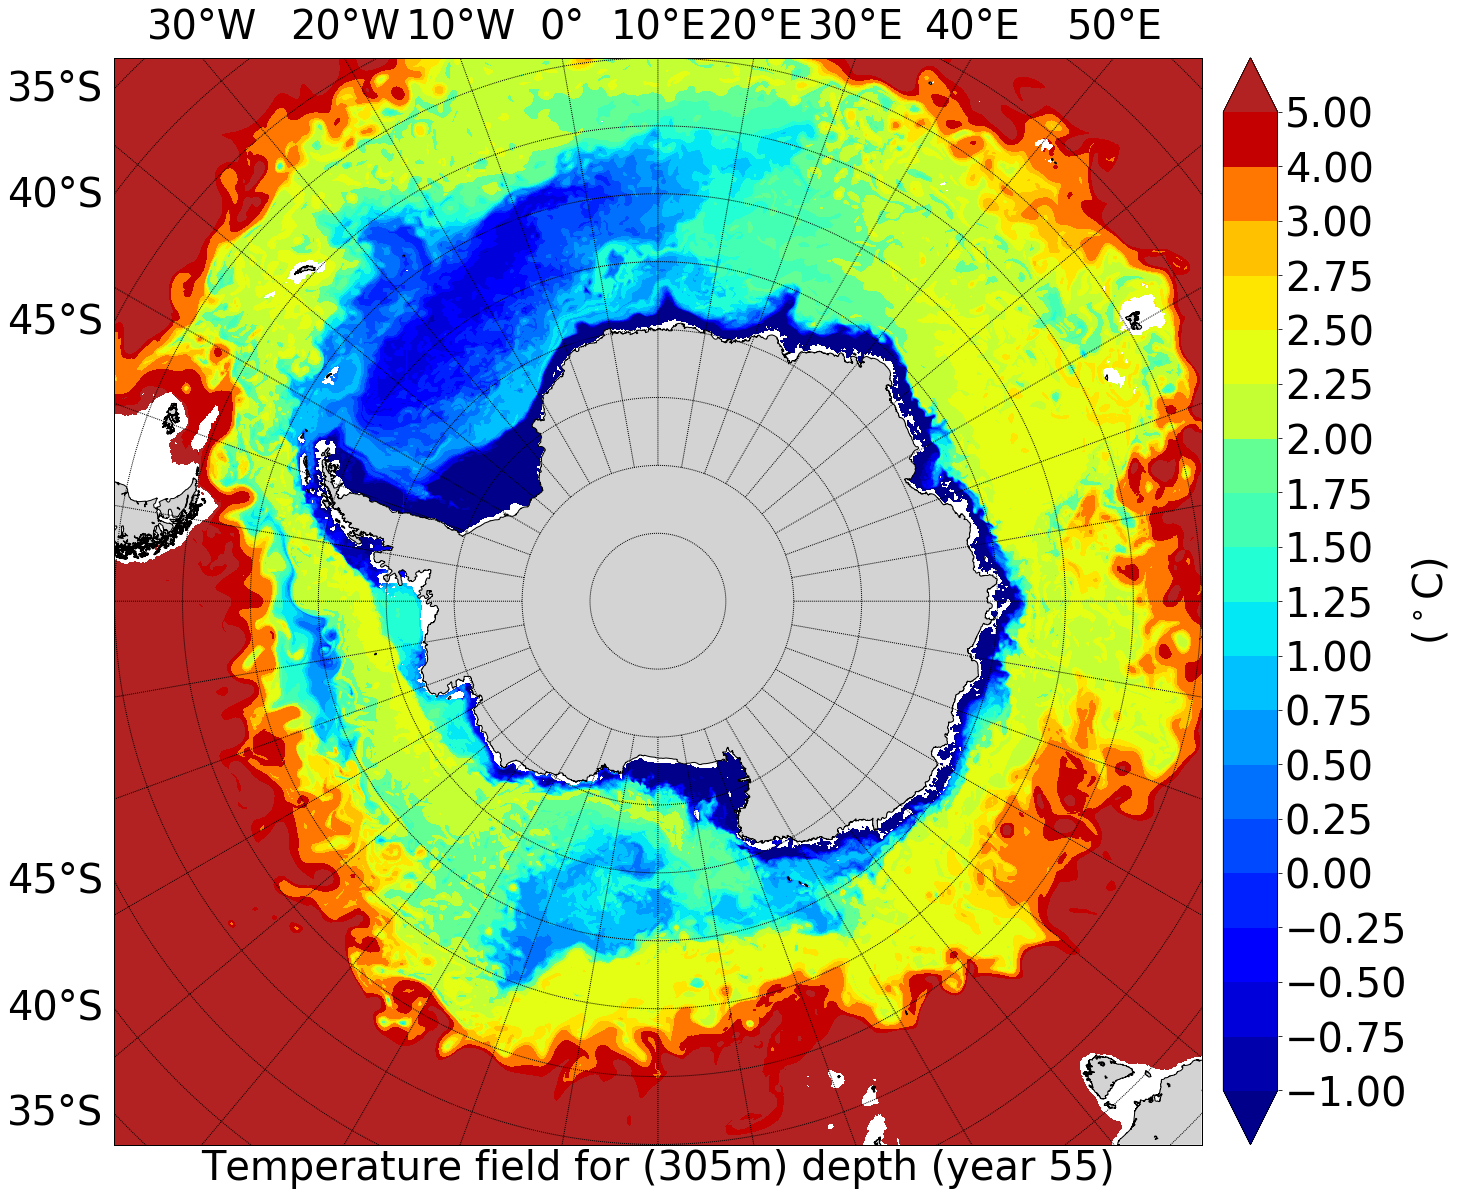

In [5]:
        plt.figure(figsize=(25,20))
        my_font = {'fontname':'Cambria', 'size':'40'}

        map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 10,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
        map.drawcoastlines()
        map.fillcontinents(color = 'lightgrey')
        map.drawmapboundary(color='black')
 
        map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
        map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

       
        xq,yq=map(lontu,lattu)

        CP = map.contourf(xq,yq,plotvar,cmap = new_cmap,spacing = 'uniform',levels = nice_levels,extend='both')
       
        CP.cmap.set_over('firebrick')
        CP.cmap.set_under('darkblue')
        cbar =map.colorbar(CP,extend='both',extendfrac='auto',ticks= nice_levels)
      
        cbar.ax.tick_params(labelsize=40) 
        cbar.set_label('($^\circ$C)', **my_font)
        plt.xlabel('Temperature field for (305m) depth (year 55)',**my_font)
        plt.savefig("/scratch/user/xiliangdiao/plot/temave(21-321)",bbox_inches='tight')